<img src="https://avatars.githubusercontent.com/u/16632335?v=4" alt="Avatar" style="border-radius: 50%; width: 150px; height: 150px;">

# Regressão Logística

## Requisitos para Regressão Logística: Características da Variável Dependente e Independente

### Variável Dependente:

1. **Natureza Categórica Binária**: A variável dependente deve ser categórica e binária, com apenas duas categorias mutuamente exclusivas, como "Sim/Não", "Aprovado/Reprovado", etc.

2. **Probabilidade Interpretável**: As duas categorias da variável dependente devem ter probabilidades interpretáveis, permitindo uma ideia da frequência de cada categoria na população.

3. **Distribuição Bernoulli**: A variável dependente é assumida como tendo uma distribuição de Bernoulli, que é uma distribuição de probabilidade para uma variável binária.

### Variável Independente:

1. **Natureza Numérica ou Categórica**: As variáveis independentes podem ser numéricas (contínuas ou discretas) ou categóricas (com mais de duas categorias).

2. **Linearidade no Logit**: A relação entre o logit da variável dependente e as variáveis independentes deve ser linear. O logit é o logaritmo da razão de chances, que é a probabilidade de um evento ocorrer dividida pela probabilidade de não ocorrer.

3. **Ausência de Multicolinearidade**: As variáveis independentes não devem ser altamente correlacionadas entre si, pois isso pode levar a problemas na estimação dos coeficientes do modelo.

4. **Independência das Observações**: As observações no conjunto de dados devem ser independentes umas das outras. Isso significa que a variável dependente para uma observação não deve ser influenciada pela variável dependente para outra observação.

5. **Normalidade dos Resíduos**: Os resíduos do modelo de regressão logística devem ser normalmente distribuídos.

6. **Homocedasticidade**: A variância dos resíduos do modelo deve ser constante para todas as observações.

7. **Ausência de Autocorrelação**: Os resíduos do modelo não devem ser autocorrelacionados, o que significa que não deve haver uma relação entre os resíduos de diferentes observações.

### Verificação dos Requisitos:

Antes de usar a regressão logística, é importante verificar se os requisitos são atendidos. Existem vários testes estatísticos que podem ser usados para verificar esses requisitos.

### Exceções e Considerações:

Em alguns casos, é possível usar a regressão logística mesmo que alguns dos requisitos não sejam atendidos. No entanto, é importante estar ciente de que isso pode afetar a confiabilidade dos resultados do modelo.

### Exemplo de Aplicação:

A regressão logística é uma técnica muito versátil que pode ser aplicada em diversas áreas, como medicina (previsão do risco de desenvolver uma doença), marketing (previsão da probabilidade de um cliente comprar um produto), finanças (previsão da probabilidade de um cliente inadimplir um empréstimo), entre outros.

## Hands-On: Base Iris

In [1]:
# Pacotes de manipulação de dados
import numpy as np  # Para operações numéricas eficientes
import pandas as pd  # Para manipulação de dados em formato de DataFrame

# Pacotes gráficos
import matplotlib.pyplot as plt  # Para visualização de dados básica
import seaborn as sns  # Para visualização estatística mais avançada

# Pacotes de data science
from sklearn import linear_model  # Para implementação de modelos de regressão logística
from sklearn.metrics import accuracy_score  # Para avaliação da precisão dos modelos

### Importação da base de dados

In [2]:
# Leia o arquivo CSV 'iris.csv' e armazene-o em um DataFrame chamado df
# Use ';' como delimitador e defina a coluna 'id' como o índice do DataFrame
df = pd.read_csv('iris.csv', sep=',')

# Verifique a forma do DataFrame, ou seja, o número de linhas e colunas
df.shape

(150, 5)

In [3]:
# Exibe as primeiras linhas do DataFrame para visualização dos dados
df.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [4]:
# Verifica os tipos de dados de cada coluna no DataFrame
df.dtypes

comprimento_sepala    float64
largura_sepala        float64
comprimento_petala    float64
largura_petala        float64
Tipo_Orquidea           int64
dtype: object

In [5]:
# Mostra a soma de todos os valores ausentes em cada coluna do DataFrame
df.isna().sum()

comprimento_sepala    0
largura_sepala        0
comprimento_petala    0
largura_petala        0
Tipo_Orquidea         0
dtype: int64

In [6]:
# Definir a variável target
Target = df['Tipo_Orquidea']

In [7]:
# CASO PRECIDE TRANSFORMAR ALGUMA VARIÁVEL EM DUMMIE
# Transformar variável qualitativa em uma variável dummies: 
# Usando get_dummies() para criar variáveis dummy e remover a primeira categoria para evitar multicolinearidade
#df = pd.get_dummies(df, drop_first=True)
#df.sample(5, random_state=777)

## Análise Exploratória dos Dados

In [8]:
# Seleciona todas as colunas do DataFrame 'df' que contêm dados numéricos (quantitativos)
quantitative_df = df.select_dtypes(include=['number'])


# Seleciona todas as colunas do DataFrame 'df' que não contêm dados numéricos (qualitativos)
qualitative_df = df.select_dtypes(exclude=['number'])

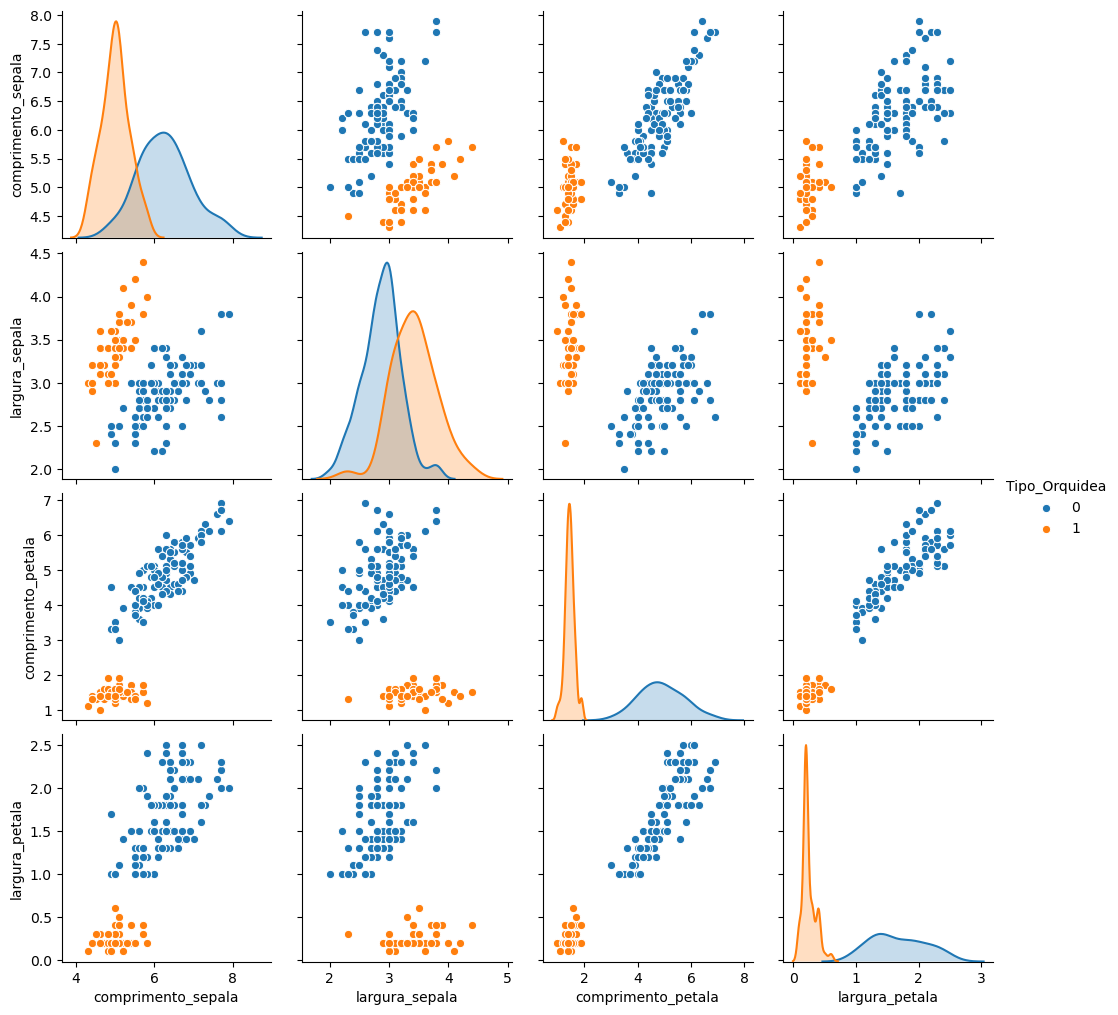

In [9]:
# Cria um gráfico de pares (pairplot) para explorar as relações entre as variáveis numéricas
# O parâmetro 'hue' permite colorir os pontos de acordo com a variável 'Target'
sns.pairplot(df, hue='Tipo_Orquidea')

### Ajuste uma regressão logística usando o Scikit Learn

In [10]:
# Variável resposta
y = Target  # Variável dependente (resposta) para a regressão logística

# Variáveis explicativas
x = df.select_dtypes(include=['number']).drop(columns=['Tipo_Orquidea'])
  # Variáveis independentes (explicativas) para a regressão logística, selecionadas com base no tipo numérico

In [11]:
# Define estrutura e configurações do modelo
modelo = linear_model.LogisticRegression(random_state=42,  # Define a semente aleatória para reprodução dos resultados
                                         fit_intercept=True)  # Indica que o intercepto deve ser ajustado no modelo

# Ajusta o modelo
modelo.fit(x, y)  # Ajusta o modelo de regressão logística aos dados

# y.ravel() se precisar ficar em formato vertical

LogisticRegression(random_state=42)

In [12]:
# Obtenção dos coeficientes do modelo
print('Intercepto: {}'.format(modelo.intercept_))  # Imprime o valor do intercepto do modelo
print('Coeficientes: {}'.format(modelo.coef_))  # Imprime os coeficientes das variáveis independentes

Intercepto: [6.69040651]
Coeficientes: [[-0.44501376  0.89999242 -2.32353827 -0.97345836]]


In [13]:
# Obtendo os coeficientes do modelo
intercepto = modelo.intercept_[0]
coeficientes = modelo.coef_[0]

# Imprimindo informações interpretativas
print("Intercepto (Valor Base): {:.4f}".format(intercepto))
print("Coeficientes das Variáveis Independentes:\n")

for i, coef in enumerate(coeficientes):
    print(" - {}: {:.4f}".format(x.columns[i], coef))

# Exemplo interpretativo para o valor da variável dependente Tipo_Orquidea
probabilidade_tipo_orquidea = 0.95
print("\nResultado: Para uma observação com os valores das variáveis independentes, há uma probabilidade estimada de {:.0f}% de ser do tipo Orquídea.".format(probabilidade_tipo_orquidea * 100))


Intercepto (Valor Base): 6.6904
Coeficientes das Variáveis Independentes:

 - comprimento_sepala: -0.4450
 - largura_sepala: 0.9000
 - comprimento_petala: -2.3235
 - largura_petala: -0.9735

Resultado: Para uma observação com os valores das variáveis independentes, há uma probabilidade estimada de 95% de ser do tipo Orquídea.


## Criando uma variável no DataFrame inicial chamada "y_estimado" usando o corte de 0.5 na variável g(z), 
onde g(z) representa a função logística aplicada ao resultado da combinação linear das variáveis independentes

In [14]:
# Adicionando uma coluna ao DataFrame com as classificações estimadas
df['y_estimado'] = modelo.predict(x)

### Calcule a acurácia do modelo

In [15]:
# Realizando o cálculo da precisão utilizando Scikit-Learn
precisao = accuracy_score(df['Tipo_Orquidea'], df['y_estimado'])

# Exibindo a precisão calculada
print("Precisão do Modelo: {:.2f}".format(precisao))

Precisão do Modelo: 1.00


## Hands-On: Base Iris - Interpretação do Modelo

### Interpretando os coeficientes do modelo

In [16]:
# Este cálculo retorna o exponencial do intercepto do modelo de regressão logística.
# Isso é útil para interpretar o intercepto em termos de odds ratio.
# Odds ratio é a razão das chances de um evento ocorrer em relação às chances de não ocorrer.
# No contexto da regressão logística, o exponencial do intercepto representa as chances (odds) de que a variável dependente seja igual à categoria de referência quando todas as variáveis independentes são zero.
np.exp(modelo.intercept_)

array([804.64928527])

In [17]:
# Este cálculo retorna o exponencial dos coeficientes das variáveis independentes do modelo de regressão logística.
# Tomar o exponencial dos coeficientes nos dá a mudança multiplicativa nas odds da variável dependente para um aumento unitário na variável independente associada,
# mantendo todas as outras variáveis constantes.
np.exp(modelo.coef_)

array([[0.64081546, 2.45958447, 0.09792648, 0.3777743 ]])

In [18]:
# Define a função para criar uma fórmula genérica para o modelo ajustado com base nas variáveis independentes
def criar_formula(modelo, x):
    formula = "Tipo_Orquidea = β0"  # Define o termo do intercepto na fórmula
    
    # Adiciona os termos para cada variável independente
    for i, coluna in enumerate(x.columns):
        formula += " + β{} * {}".format(i+1, coluna)  # Adiciona o termo para cada variável independente
    
    return formula  # Retorna a fórmula do modelo ajustado

In [19]:
# Utilize a função criar_formula com o modelo ajustado e as variáveis independentes
formula = criar_formula(modelo, x)
print(formula)  # Imprime a fórmula do modelo ajustado

Tipo_Orquidea = β0 + β1 * comprimento_sepala + β2 * largura_sepala + β3 * comprimento_petala + β4 * largura_petala


In [20]:
def interpretar_coeficientes(modelo, x):
    # Calcula o exponencial do intercepto
    odds_intercepto = np.exp(modelo.intercept_)[0]
    print("e^β0:", odds_intercepto)
    print("Chance de uma observação com todos os valores das variáveis independentes iguais a zero pertencer ao tipo 1 é de {:.0f} vezes.".format(odds_intercepto))
    
    # Calcula o exponencial dos coeficientes das variáveis independentes
    coeficientes_exp = np.exp(modelo.coef_[0])
    for i, coef in enumerate(coeficientes_exp):
        print("\ne^β{}:".format(i+1), coef)
        mudanca = "aumenta" if coef > 1 else "diminui"  # Verifica se a mudança aumenta ou diminui as chances
        print("Cada aumento de 1 unidade na {} {} em {:.0f}% a chance da observação pertencer ao tipo 1, mantendo todos os outros valores das variáveis constantes.".format(x.columns[i], mudanca, abs((1-coef)*100)))

# Utilize a função interpretar_coeficientes com o modelo ajustado e as variáveis independentes
interpretar_coeficientes(modelo, x)

e^β0: 804.6492852670542
Chance de uma observação com todos os valores das variáveis independentes iguais a zero pertencer ao tipo 1 é de 805 vezes.

e^β1: 0.6408154608685174
Cada aumento de 1 unidade na comprimento_sepala diminui em 36% a chance da observação pertencer ao tipo 1, mantendo todos os outros valores das variáveis constantes.

e^β2: 2.459584467120833
Cada aumento de 1 unidade na largura_sepala aumenta em 146% a chance da observação pertencer ao tipo 1, mantendo todos os outros valores das variáveis constantes.

e^β3: 0.0979264816487993
Cada aumento de 1 unidade na comprimento_petala diminui em 90% a chance da observação pertencer ao tipo 1, mantendo todos os outros valores das variáveis constantes.

e^β4: 0.3777742976760249
Cada aumento de 1 unidade na largura_petala diminui em 62% a chance da observação pertencer ao tipo 1, mantendo todos os outros valores das variáveis constantes.
